# Lever centered firing rate maps

This is a copy from Beate code to get the "myLeverMapsDissociateStats.pickle" for all the sessions, what beate ran was only for 90 sessions 

The main code is here: repo/autopi_mec_pub/Beate/lever_anchored_fields/lever_centered_maps.ipynb

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run setup_project.py
%run generic_plot_functions.py

projectName, dataPath, dlcModelPath, myProject, sSessions = setup_project_session_lists(projectName="autopi_inter",
                                                                dataPath="/adata/projects/autopi_inter/",dlcModelPath="/adata/models")


creating myProject, an autopipy.project object
Project name: autopi_inter
dataPath: /adata/projects/autopi_inter/
dlcModelPath: /adata/models
Reading /adata/projects/autopi_inter//sessionList
We have 180 testing sessions in the list
spikeA.Kilosort_session objects are in sSessions


In [2]:
prepareSessionsForSpatialAnalysisProject(sSessions,myProject.sessionList) ### sSeslist >>>> sSessions

Loading Animal_pose and Spike_train, sSes.ap and sSes.cg
Will load .pose.npy


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 180/180 [03:44<00:00,  1.24s/it]


Loading ses.trial_table_simple as ses.trials
Create condition intervals in ses.intervalDict


In [3]:
for ses, sSes in tqdm(zip(myProject.sessionList,sSessions)):
    getSearchHomingIntervals(ses,sSes)
ses.intervalDict.keys()

180it [00:04, 40.54it/s]


dict_keys(['circ80', 'circ80_1', 'circ80_2', 'task', 'task_1', 'task_2', 'light', 'light_1', 'light_2', 'dark', 'dark_1', 'dark_2', 'trialNo', 'searchPath_light', 'searchPath_light_1', 'searchPath_light_2', 'searchPath_dark', 'searchPath_dark_1', 'searchPath_dark_2', 'searchToLeverPath_light', 'searchToLeverPath_light_1', 'searchToLeverPath_light_2', 'searchToLeverPath_dark', 'searchToLeverPath_dark_1', 'searchToLeverPath_dark_2', 'homingPath_light', 'homingPath_light_1', 'homingPath_light_2', 'homingPath_dark', 'homingPath_dark_1', 'homingPath_dark_2', 'homingFromLeavingLever_light', 'homingFromLeavingLever_light_1', 'homingFromLeavingLever_light_2', 'homingFromLeavingLever_dark', 'homingFromLeavingLever_dark_1', 'homingFromLeavingLever_dark_2', 'homingFromLeavingLeverToPeriphery_light', 'homingFromLeavingLeverToPeriphery_light_1', 'homingFromLeavingLeverToPeriphery_light_2', 'homingFromLeavingLeverToPeriphery_dark', 'homingFromLeavingLeverToPeriphery_dark_1', 'homingFromLeavingLeverT

In [4]:
fn=myProject.dataPath+"/results/cells_with_leverCells.csv"
print('loading', fn)
cells = pd.read_csv(fn)

fn = myProject.dataPath+"/results/myMaps.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    print('loading',fn)
    myMaps = pickle.load(handle)

loading /adata/projects/autopi_inter//results/cells_with_leverCells.csv
loading /adata/projects/autopi_inter//results/myMaps.pickle


In [5]:
gridcell_table=cells[cells['gridCell_AND']]
gridcell_table

,cluId,session,mouse,mean_rate,refractory,refractoryClean,usable,sumShortAuto,meanRateStable,mrate_RF1,...,borderCell_AND,borderCell_OR,borderCell_FIRST,borderCell,onlySpatialSelective,speedCell_AND,speedCell_OR,speedCell_FIRST,leverCell_all_light,leverCell_all_dark
27,mn8578-05122021-0108_61,mn8578-05122021-0108,mn8578,8.014829,0.097981,True,True,32890.0,True,7.892154,...,False,False,False,False,False,True,True,True,True,True
32,mn8578-05122021-0108_161,mn8578-05122021-0108,mn8578,7.329768,0.042397,True,True,23832.0,True,5.983500,...,False,False,False,False,False,False,False,False,True,True
39,mn8578-05122021-0108_233,mn8578-05122021-0108,mn8578,1.576464,0.043272,True,True,2113.0,True,1.309752,...,False,False,False,False,False,True,True,True,True,False
42,mn8578-05122021-0108_238,mn8578-05122021-0108,mn8578,4.762500,0.075260,True,True,11964.0,True,5.726513,...,False,False,False,False,False,True,True,True,True,True
44,mn8578-05122021-0108_247,mn8578-05122021-0108,mn8578,3.295005,0.107630,True,True,6306.0,True,3.378334,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9304,jp486-05032023-0108_1367,jp486-05032023-0108,jp486,3.328628,0.093460,True,True,5837.0,True,3.634450,...,False,False,False,False,False,False,True,True,False,False
9326,jp486-05032023-0108_1538,jp486-05032023-0108,jp486,4.125202,0.017784,True,True,3665.0,True,4.883878,...,False,False,False,False,False,False,True,False,True,False
9392,jp486-25032023-0108_570,jp486-25032023-0108,jp486,1.462024,0.038471,True,True,4719.0,True,1.269551,...,False,False,False,False,False,True,True,True,False,True
9991,jp487-06022023-0108_688,jp487-06022023-0108,jp487,3.590828,0.029410,True,True,33400.0,True,0.740065,...,False,False,False,False,False,False,False,False,True,False


## Firing rate maps around the lever

In [6]:
def getLeverMaps(ses,sSes,interName="light",maxDistance=30, rotationType="none",smooth=True,
                 invalidateSmallBridgeAngle=False,invalidateMaxAngle=np.pi/12,
                 rateType="map",stats=False, refToLever=True):
    """
    Get all the lever-centered firing rate maps or firing rate polar plots around the lever. The data can be plotted in different reference coordinate system.
    The lever position is set to 0,0.
    The orientation is either unchanged ("none") or relative to the vector going from the lever to the bridge ("bridge") or relative to the lever orientation ("lever")
    
    
    Arguments
    ses: autopipy session
    sSes: spikeA session
    interName: name of intervals to use (from ses.intervalDict)
    maxDistance: max distance from lever
    rotationType: can be "none","bridge","lever", once centered on the lever,
                    we can rotate the position to have different reference frame (cartesian (none), relative to bridge direction, relative to lever orientation)
    invalidateSmallBridgeAngle: whether to invalidate lever position when the bridge angle is small (for which cartesian and brdige reference frames are the same)
                                This is done to eliminate data when the none and brdige rotations are the same
                                This can be used to better contrast the prediction of "bridge" and "none" rotation
    invalidateMaxAngle: angle below which we invalidate
    rateType: (map) firing rate maps or (angular) angular rate histogram
    stats: whether to return the statistics instead of the map.
    
    """
   
    # change the x and y position of the mouse so that it is relative to the lever position
    #print(ses.name)
    
    sSes.ap.load_pose_from_file() # get original hd data, which file depends on what we used when calling prepareSessionsForSpatialAnalysis
    
    if not refToLever=="arenaref":
    # transform the coordinate system of the position data, in setup_project.py
        toLeverReferenceFrame(ses=ses,sSes=sSes,maxDistance=maxDistance, rotationType=rotationType,
                             invalidateSmallBridgeAngle=invalidateSmallBridgeAngle,invalidateMaxAngle=invalidateMaxAngle)
    else:#we use the same position data as in the lever-centered maps, but we don't change reference frame
        leverX,leverY,leverOri = getLeverPosition(ses)
        mouseX = sSes.ap.pose_ori[:,1]-leverX
        mouseY = sSes.ap.pose_ori[:,2]-leverY
    
        D = np.sqrt(mouseX**2+mouseY**2)
        sSes.ap.pose_ori[:,1][D>maxDistance]= np.nan
        sSes.ap.pose_ori[:,2][D>maxDistance]= np.nan


    sSes.ap.set_intervals(ses.intervalDict[interName])

    if rateType=="map": # normal 2D maps
        for n in sSes.cg.neuron_list:
            n.spike_train.set_intervals(ses.intervalDict[interName])
            if stats==False:
                if not refToLever=="arenaref":
                    n.spatial_properties.firing_rate_map_2d(cm_per_bin =1, smoothing_sigma_cm = 2, smoothing=smooth,xy_range = np.array([[-maxDistance,-maxDistance],[maxDistance,maxDistance]]) )
                else:
                    n.spatial_properties.firing_rate_map_2d(cm_per_bin =3, smoothing_sigma_cm = 6, smoothing=smooth,xy_range = np.array([[-50,-50],[50,50]]))
            else:
                if not refToLever=="arenaref":
                    n.spatial_properties.firing_rate_map_2d(cm_per_bin =1, smoothing_sigma_cm = 0, smoothing=smooth,xy_range = np.array([[-maxDistance,-maxDistance],[maxDistance,maxDistance]]) )
                else:
                    n.spatial_properties.firing_rate_map_2d(cm_per_bin =3, smoothing_sigma_cm = 0, smoothing=smooth,xy_range = np.array([[-50,-50],[50,50]]))
        if stats==False:
            mapList = [ n.spatial_properties.firing_rate_map for n in sSes.cg.neuron_list ]
            mapStack = np.stack(mapList, axis=0)
        else:
            mapList =  [ n.spatial_properties.information_score() for n in sSes.cg.neuron_list ]
            mapStack = np.stack(mapList, axis=0)
    elif rateType=="angular" :# angular 1D maps
        for n in sSes.cg.neuron_list:
            n.spike_train.set_intervals(ses.intervalDict[interName])
            n.spatial_properties.firing_rate_head_direction_histogram(deg_per_bin=10, smoothing_sigma_deg=10, smoothing=True)
        if stats == False:
            mapList = [ n.spatial_properties.firing_rate_head_direction_histo for n in sSes.cg.neuron_list ]
            mapStack = np.stack(mapList, axis=0)
        else:
            mapList = [ np.array(n.spatial_properties.head_direction_score()) for n in sSes.cg.neuron_list ] #mean_direction_rad, mean_direction_deg, mean_vector_length, peak_angle_rad, peak_rate
            mapStack = np.stack(mapList, axis=0)
    else:
        print("rateType not supported")
    
    sSes.ap.load_pose_from_file() # get original position data
    
    return mapStack

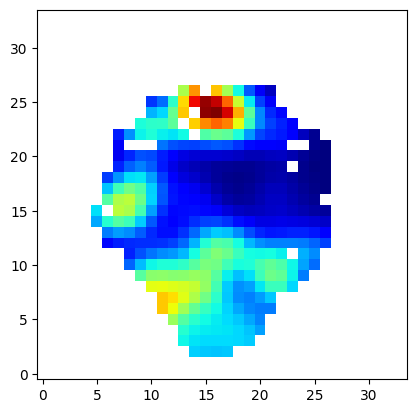

In [7]:
plt.imshow(myMaps['all_light'][3].T, origin='lower',cmap='jet')

In [10]:
rateType="map"
sSes = sSessions[-1]
ses = myProject.sessionList[-1]
resMap = {}
for rotType in ["lever","bridge","none"]:
    resMap[rotType] = getLeverMaps(ses,sSes,interName="all_light",maxDistance=18,
                      rotationType = rotType, invalidateSmallBridgeAngle=False, rateType=rateType,stats=False)

In [8]:
conditions = ["all_light","all_dark","all_light_1","all_light_2","all_dark_1","all_dark_2"]
keys = conditions

In [12]:
%%time
myLeverMapsDissociate = {}
for rateType in ["map","angular"]:
    myLeverMapsDissociate[rateType]={}
    for key,cond in zip(keys,conditions):
        myLeverMapsDissociate[rateType][key] = {}
        for rotType in ["lever","bridge","none"]:
            print(rateType,key,rotType)
            myLeverMapsDissociate[rateType][key][rotType] = np.concatenate([getLeverMaps(ses,sSes,cond,
                                            maxDistance=18,rotationType = rotType, 
                                            invalidateSmallBridgeAngle=True, rateType=rateType,
                                            stats=False) for ses,sSes in tqdm(zip(myProject.sessionList,sSessions))])

map all_light lever


180it [11:14,  3.75s/it]


map all_light bridge


180it [09:51,  3.28s/it]


map all_light none


180it [13:46,  4.59s/it]


map all_dark lever


180it [11:06,  3.70s/it]


map all_dark bridge


180it [11:25,  3.81s/it]


map all_dark none


180it [10:58,  3.66s/it]


map all_light_1 lever


180it [08:20,  2.78s/it]


map all_light_1 bridge


180it [08:13,  2.74s/it]


map all_light_1 none


180it [08:14,  2.75s/it]


map all_light_2 lever


180it [08:22,  2.79s/it]


map all_light_2 bridge


180it [08:24,  2.80s/it]


map all_light_2 none


180it [08:31,  2.84s/it]


map all_dark_1 lever


180it [08:23,  2.80s/it]


map all_dark_1 bridge


180it [06:34,  2.19s/it]


map all_dark_1 none


180it [05:41,  1.90s/it]


map all_dark_2 lever


180it [05:45,  1.92s/it]


map all_dark_2 bridge


180it [05:48,  1.94s/it]


map all_dark_2 none


180it [05:46,  1.93s/it]


angular all_light lever


180it [09:05,  3.03s/it]


angular all_light bridge


180it [10:49,  3.61s/it]


angular all_light none


180it [09:54,  3.30s/it]


angular all_dark lever


180it [09:27,  3.15s/it]


angular all_dark bridge


180it [10:15,  3.42s/it]


angular all_dark none


180it [09:25,  3.14s/it]


angular all_light_1 lever


180it [06:42,  2.23s/it]


angular all_light_1 bridge


180it [05:55,  1.97s/it]


angular all_light_1 none


180it [05:53,  1.96s/it]


angular all_light_2 lever


180it [05:52,  1.96s/it]


angular all_light_2 bridge


180it [05:54,  1.97s/it]


angular all_light_2 none


180it [05:52,  1.96s/it]


angular all_dark_1 lever


180it [05:38,  1.88s/it]


angular all_dark_1 bridge


180it [05:39,  1.89s/it]


angular all_dark_1 none


180it [05:41,  1.90s/it]


angular all_dark_2 lever


180it [05:41,  1.90s/it]


angular all_dark_2 bridge


180it [05:44,  1.91s/it]


angular all_dark_2 none


180it [05:41,  1.90s/it]

CPU times: user 3h 58min 4s, sys: 15min 18s, total: 4h 13min 23s
Wall time: 4h 45min 44s


In [13]:
%%time

fn=myProject.dataPath+"/results/myLeverMapsDissociate_180.pickle"
print("saving:",fn)
with open(fn, 'wb') as handle:
    pickle.dump(myLeverMapsDissociate, handle)

saving: /adata/projects/autopi_inter//results/myLeverMapsDissociate_180.pickle
CPU times: user 286 ms, sys: 1.83 s, total: 2.12 s
Wall time: 11.1 s


In [9]:
%%time
myLeverMapsDissociateStats = {}
for rateType in ["angular"]:
    myLeverMapsDissociateStats[rateType]={}
    for key,cond in zip(keys,conditions):
        myLeverMapsDissociateStats[rateType][key] = {}
        for rotType in ["lever","bridge","none"]:
            print(rateType,key,rotType)
            myLeverMapsDissociateStats[rateType][key][rotType] = np.concatenate([getLeverMaps(ses,sSes,cond,
                                                                            maxDistance=18,rotationType = rotType, 
                                                                            invalidateSmallBridgeAngle=True, rateType=rateType,
                                                                            stats=True) for ses,sSes in tqdm(zip(myProject.sessionList,sSessions))])

angular all_light lever


180it [10:28,  3.49s/it]


angular all_light bridge


180it [10:10,  3.39s/it]


angular all_light none


180it [10:11,  3.40s/it]


angular all_dark lever


180it [10:47,  3.60s/it]


angular all_dark bridge


180it [12:00,  4.00s/it]


angular all_dark none


180it [10:48,  3.60s/it]


angular all_light_1 lever


180it [07:01,  2.34s/it]


angular all_light_1 bridge


180it [05:58,  1.99s/it]


angular all_light_1 none


180it [05:57,  1.99s/it]


angular all_light_2 lever


180it [05:59,  2.00s/it]


angular all_light_2 bridge


180it [05:58,  1.99s/it]


angular all_light_2 none


180it [05:58,  1.99s/it]


angular all_dark_1 lever


180it [05:44,  1.91s/it]


angular all_dark_1 bridge


180it [05:43,  1.91s/it]


angular all_dark_1 none


180it [05:42,  1.90s/it]


angular all_dark_2 lever


180it [05:45,  1.92s/it]


angular all_dark_2 bridge


180it [05:47,  1.93s/it]


angular all_dark_2 none


180it [05:45,  1.92s/it]

CPU times: user 1h 58min 5s, sys: 7min 20s, total: 2h 5min 25s
Wall time: 2h 15min 51s


In [11]:
fn=myProject.dataPath+"/results/myLeverMapsDissociateStats_180.pickle"
print("saving:",fn)
with open(fn, 'wb') as handle:
    pickle.dump(myLeverMapsDissociateStats, handle)

saving: /adata/projects/autopi_inter//results/myLeverMapsDissociateStats_180.pickle
